In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('Temp_Data.csv', index_col = 'DATE', parse_dates = True)

In [3]:
df

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06
...,...,...,...,...
2021-06-03,18.55,83.5,12.0,101.14
2021-06-04,20.80,78.0,18.0,100.85
2021-06-05,22.75,71.5,13.5,100.76


In [4]:
df.head()

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06


In [5]:
df.index.freq = 'D'

In [6]:
df

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06
...,...,...,...,...
2021-06-03,18.55,83.5,12.0,101.14
2021-06-04,20.80,78.0,18.0,100.85
2021-06-05,22.75,71.5,13.5,100.76


In [7]:
#we want to forecast temperature and features

In [8]:
df = pd.Dataframe(df['Temp'])

AttributeError: module 'pandas' has no attribute 'Dataframe'

<Axes: xlabel='DATE'>

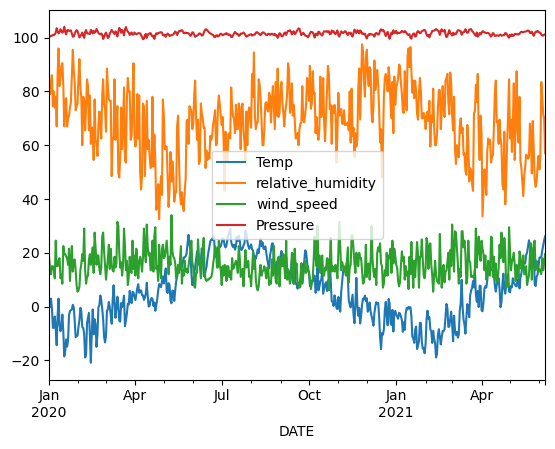

In [10]:
df.plot()

In [11]:
train = df.iloc[:510,0]
test = df.iloc[510:,0]

In [12]:
#seasonal decomposing  to create a variable named dicom , ya aya ya 
from statsmodels.tsa.seasonal import seasonal_decompose

<Axes: xlabel='DATE', ylabel='Resid'>

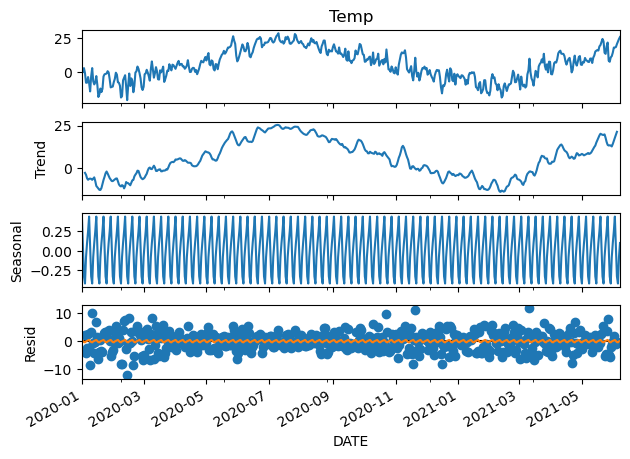

In [16]:
'''from statsmodels.tsa.seasonal import seasonal_decompose

Decomp_results = seasonal_decompose(df)

Decomp_results.plot()

Decomp_results.seasonal.plot()

from statsmodels.tsa.seasonal import seasonal_decompose'''

# Assuming df is your time series data
Decomp_results = seasonal_decompose(df['Temp'])

Decomp_results.plot()

# Access and plot the seasonal component
Decomp_results.seasonal.plot()



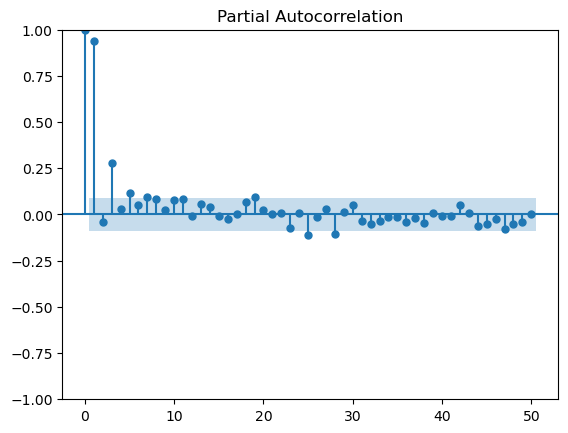

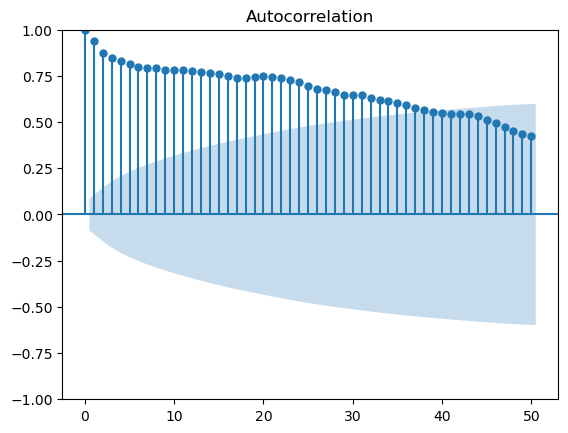

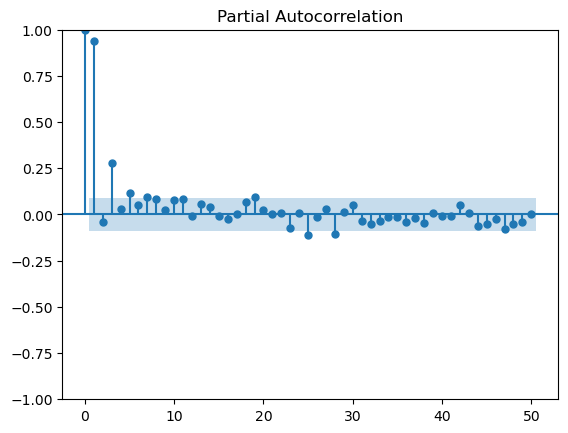

In [17]:
# Finding the Parameters (p,d,q)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train, lags=50)

plot_pacf(train, lags=50)


                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                  510
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1378.671
Date:                Mon, 22 Apr 2024   AIC                           2765.341
Time:                        15:48:32   BIC                           2782.271
Sample:                    01-01-2020   HQIC                          2771.979
                         - 05-24-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3234      0.077      4.216      0.000       0.173       0.474
ma.L1         -0.3850      0.074     -5.223      0.000      -0.529      -0.240
ma.L2         -0.4007      0.046     -8.772      0.0

C:\Users\mayan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


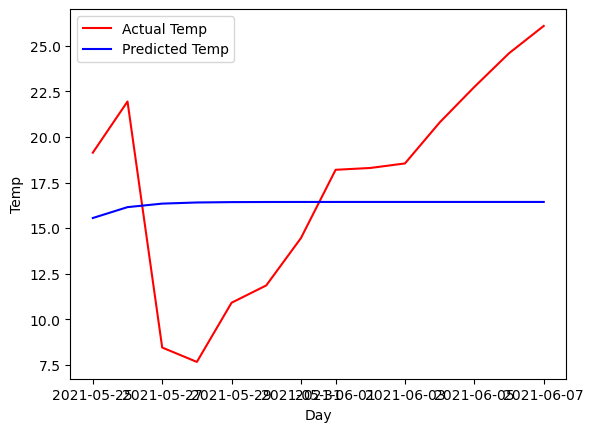

In [20]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming train and test are your train and test data respectively

# Fit ARIMA model
A_Model = ARIMA(train, order=(1, 1, 2))
predictor = A_Model.fit()

# Get summary of the model
print(predictor.summary())
#in order to check the model summary

# Make predictions
Predicted_results = predictor.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Plot actual vs predicted
plt.plot(test, color='red', label='Actual Temp')
plt.plot(Predicted_results, color='blue', label='Predicted Temp')
plt.xlabel('Day')
plt.ylabel('Temp')
plt.legend()
plt.show()
